In [39]:
import  numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors,datasets
import pandas as pd

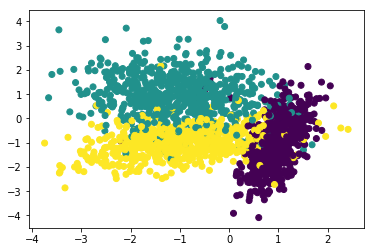

In [40]:
from sklearn.datasets.samples_generator import make_classification
# X为样本特征，y为样本输出类别，共200个样本，每个样本2个特征，没有冗余特征，
# 每个类别有一个簇，输出有3个类别
X,y = make_classification(n_samples = 2000,n_features = 2,n_redundant = 0,                
                          n_clusters_per_class = 1,n_classes = 3)
plt.scatter(X[:,0],X[:,1],marker='o',c=y)
plt.show()

In [41]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 15,weights = 'distance')
clf.fit(X,y)  #用KNN来拟合模型，选择k=15，权重为距离远近
h = .02  #网格中的步长
#确认训练集的边界，生成随机数据来做测试集，然后作预测
x_min,x_max = X[:,0].min() - 1,X[:,0].max() + 1
y_min,y_max = X[:,1].min() - 1,X[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                   np.arange(y_min,y_max,h))  #生成网格二维数据对
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

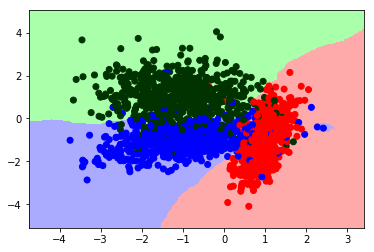

In [42]:
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#003300','#0000FF'])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.scatter(X[:,0],X[:,1],c = y,cmap = cmap_bold)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

In [ ]:
clf1 = neighbors.RadiusNeighborsClassifier(10.0,weights = 'distance')
clf1.fit(X,y)
Z1 = clf1.predict(np.c_[xx.ravel(),yy.ravel()])
Z1 = Z1.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z1,cmap = cmap_light)
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()